**Author: Ritu Indoliya**

Data Science & Business Analytics Intern

**Task 7: Stock Market Prediction using Numerical and Textual Analysis**

**GRIP - The Sparks Foundation**

Stock to analyze and predict SENSEX (S&P BSE SENSEX) and to create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices and sentimental analysis of news headlines.

**Tools: Numpy Array, Pandas, Matplotlib, Scikit Learn**

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
#from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Step 1 : Importing the Numerical dataset and performing Exploratory Analysis

In [ ]:
# Dataframe for exploratory analysis
import pandas as pd
url='https://raw.githubusercontent.com/kritika-srivastava/The-Sparks-Foundation-Tasks/2719a24c7187b9f0e29cd82b4b8dbb57b0084a74/csv/%5EBSESN.csv'
df=pd.read_csv(url,encoding='unicode_escape')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-16,38637.050781,38666.378906,38416.671875,38598.988281,38598.988281,27500.0
1,2019-10-17,38647.441406,39104.691406,38557.429688,39052.058594,39052.058594,47100.0
2,2019-10-18,39087.828125,39361.058594,38963.601563,39298.378906,39298.378906,42400.0
3,2019-10-22,39233.398438,39426.468750,38924.851563,38963.839844,38963.839844,54500.0
4,2019-10-23,39063.839844,39196.671875,38866.078125,39058.828125,39058.828125,41000.0


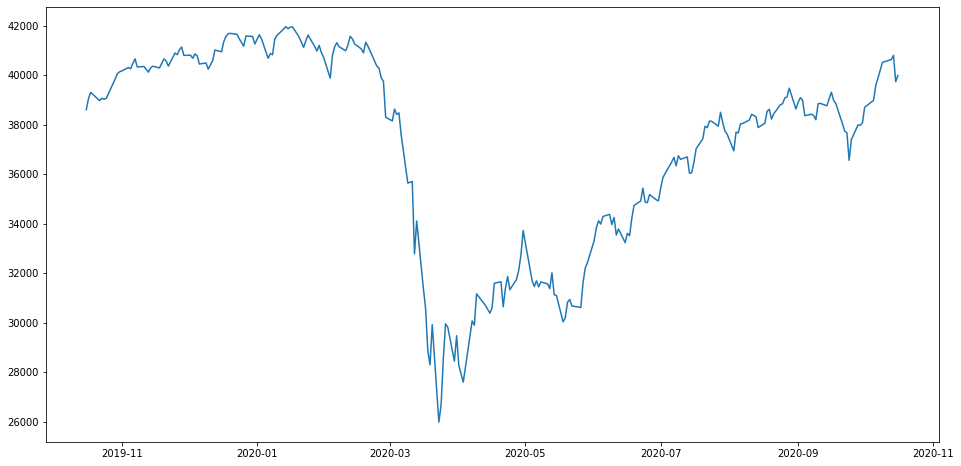

In [ ]:
# Extract date frame and plot closing stock price w.r.t time
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df.dropna(inplace=True)
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [ ]:
# fix random seed for reproducibility
np.random.seed(7)

Step 2 : Creating a dataframe for storing the Closing stock data per day

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(df2, look_back=1):
	dataX, dataY = [], []
	for i in range(len(df2)-look_back-1):
		a = df2[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(df2[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/kritika-srivastava/The-Sparks-Foundation-Tasks/2719a24c7187b9f0e29cd82b4b8dbb57b0084a74/csv/%5EBSESN.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

Step 3 : Data Normalization and Division into Training and Test sets

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

# split into train and test sets
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

In [ ]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

Step 4 : Creating a LSTM for Numerical Analysis

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
162/162 - 2s - loss: 0.3508 - 2s/epoch - 11ms/step
Epoch 2/100
162/162 - 0s - loss: 0.0454 - 290ms/epoch - 2ms/step
Epoch 3/100
162/162 - 0s - loss: 0.0250 - 276ms/epoch - 2ms/step
Epoch 4/100
162/162 - 0s - loss: 0.0144 - 260ms/epoch - 2ms/step
Epoch 5/100
162/162 - 0s - loss: 0.0079 - 273ms/epoch - 2ms/step
Epoch 6/100
162/162 - 0s - loss: 0.0047 - 298ms/epoch - 2ms/step
Epoch 7/100
162/162 - 0s - loss: 0.0036 - 268ms/epoch - 2ms/step
Epoch 8/100
162/162 - 0s - loss: 0.0033 - 271ms/epoch - 2ms/step
Epoch 9/100
162/162 - 0s - loss: 0.0033 - 270ms/epoch - 2ms/step
Epoch 10/100
162/162 - 0s - loss: 0.0033 - 306ms/epoch - 2ms/step
Epoch 11/100
162/162 - 0s - loss: 0.0031 - 272ms/epoch - 2ms/step
Epoch 12/100
162/162 - 0s - loss: 0.0032 - 268ms/epoch - 2ms/step
Epoch 13/100
162/162 - 0s - loss: 0.0032 - 272ms/epoch - 2ms/step
Epoch 14/100
162/162 - 0s - loss: 0.0031 - 270ms/epoch - 2ms/step
Epoch 15/100
162/162 - 0s - loss: 0.0032 - 285ms/epoch - 2ms/step
Epoch 16/100
162/162 

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

Step:5 Making Prediction

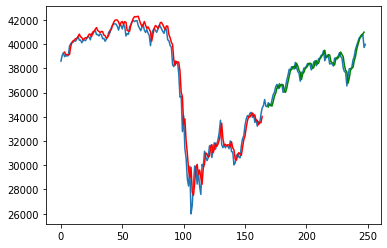

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Root mean square error = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Root mean square error = ",testScore," RMSE")

Root mean square error =  760.5247083498352  RMSE
Root mean square error =  423.9231869951365  RMSE


Step 6 : Creating a Hybrid model for Numerical and textual Analysis

In [ ]:
columns = ['Date','Category','News']
path='/content/drive/MyDrive/india-news-headlines.csv'
news = pd.read_csv(path, names = columns)
news

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3424063,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,20201231,removed,Govt extends deadline for use of FASTag till F...


Step 7 : Text preprocessing

In [ ]:
news.drop(0, inplace=True)
news.drop('Category', axis = 1, inplace=True)
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424067 entries, 1 to 3424067
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 78.4+ MB


In [ ]:
# Restructuring the date format
news['Date'] = pd.to_datetime(news['Date'],format= '%Y %m %d')
news

,Date,News
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02 00:00:00.000000000,Fissures in Hurriyat over Pak visit
3,2001-01-02 00:00:00.000000000,America's unwanted heading for India?
4,2001-01-02 00:00:00.000000000,For bigwigs; it is destination Goa
5,2001-01-02 00:00:00.000000000,Extra buses to clear tourist traffic
...,...,...
3424063,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,1970-01-01 00:00:00.020201231,Govt extends deadline for use of FASTag till F...


In [ ]:
#Grouping the headlines for each day
news['News'] = news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
news = news.drop_duplicates() 
news.reset_index(inplace = True, drop = True)
news

,Date,News
0,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...
2,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...
3,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...
4,2001-01-06 00:00:00.000000000,Light combat craft takes India into club class...
...,...,...
7258,1970-01-01 00:00:00.020201227,#BigInterview! Dhritiman Chatterjee: Nobody da...
7259,1970-01-01 00:00:00.020201228,Horoscope Today; 28 December 2020: Check astro...
7260,1970-01-01 00:00:00.020201229,Man recovers charred remains of 'thief' from h...
7261,1970-01-01 00:00:00.020201230,Numerology Readings 30 December 2020: Predicti...


In [ ]:
news['News']

0       Status quo will not be disturbed at Ayodhya; s...
1       Powerless north India gropes in the dark Think...
2       The string that pulled Stephen Hawking to Indi...
3       Light combat craft takes India into club class...
4       Light combat craft takes India into club class...
                              ...                        
7258    #BigInterview! Dhritiman Chatterjee: Nobody da...
7259    Horoscope Today; 28 December 2020: Check astro...
7260    Man recovers charred remains of 'thief' from h...
7261    Numerology Readings 30 December 2020: Predicti...
7262    Horoscope Today; 31 December 2020: Check astro...
Name: News, Length: 7263, dtype: object

Step 8 : Adding subjectivity and polarity Scores


In [ ]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity


In [ ]:
#Adding subjectivity and polarity columns
news['Subjectivity'] = news['News'].apply(getSubjectivity)
news['Polarity'] = news['News'].apply(getPolarity)
news

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,News,Subjectivity,Polarity
0,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
1,2001-01-03 00:00:00.000000000,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,2001-01-04 00:00:00.000000000,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
3,2001-01-05 00:00:00.000000000,Light combat craft takes India into club class...,0.476612,0.262024
4,2001-01-06 00:00:00.000000000,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
7258,1970-01-01 00:00:00.020201227,#BigInterview! Dhritiman Chatterjee: Nobody da...,0.395808,0.035886
7259,1970-01-01 00:00:00.020201228,Horoscope Today; 28 December 2020: Check astro...,0.412945,0.070517
7260,1970-01-01 00:00:00.020201229,Man recovers charred remains of 'thief' from h...,0.424021,0.061210
7261,1970-01-01 00:00:00.020201230,Numerology Readings 30 December 2020: Predicti...,0.441660,0.043496


Step 9 : Visualizing the polarity and Subjectivity scores

In [ ]:
plt.figure(figsize = (10,6))
news['Polarity'].hist(color = 'red')

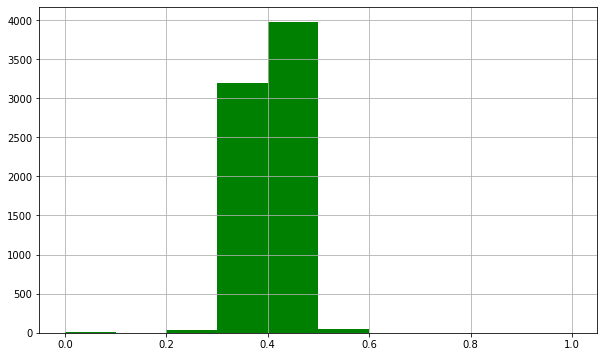

In [ ]:
plt.figure(figsize = (10,6))
news['Subjectivity'].hist(color = 'green')


Step 10 : Performing Sentiment Analysis over the news Headlines


In [ ]:
#Adding sentiment score to news
sia = SentimentIntensityAnalyzer()

news['Compound'] = [sia.polarity_scores(v)['compound'] for v in news['News']]
news['Negative'] = [sia.polarity_scores(v)['neg'] for v in news['News']]
news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news['News']]
news['Positive'] = [sia.polarity_scores(v)['pos'] for v in news['News']]
news

Step 11 : Merging the numerical and textual data


In [ ]:
merge = news
merge


In [ ]:
dff = merge[['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
dff

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(dff))
new_df.columns = dff.columns
new_df.index = dff.index
new_df.head()

In [ ]:
X = new_df[0:249]
y =df['Close']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

NameError: ignored

In [ ]:
x_train[:10]

Step 12 : Training a Random Forest Regressor and Adaboost Regressor for hybrid analysis


In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

Step 13 : Determining the accuracy scores for both the Models


In [ ]:
print(prediction[:10])
print(y_test[:10])
print("Root mean square error = ",math.sqrt(mean_squared_error(prediction,y_test))," RMSE")

In [ ]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)

In [ ]:
print("Root mean square error = ",math.sqrt(mean_squared_error(predictions, y_test))," RMSE")

I have used two models, i.e., Random Forest Regressor and Adaboost Regressor to carry out hybrid analysis. From the RMSE values we see that Random Forest Regressor gives a mode accurate output (3960 RMSE). However, both the models have very high RMSE values. The reason for high values is the unpredictible nature of the stock prices.


**Conclusion**

I was able to create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines.

**Thank You**